# DIABETES PREDICTION USING MACHINE LEARNING

In [1]:
!pip install numpy pandas seaborn statsmodels matplotlib scikit-learn


In [2]:
# importing the important libraries
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
#to ignore all the warnings
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [3]:
#versions used
print(f"Python: {sys.version}")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Statsmodels: {sm.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")

Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
NumPy: 1.25.2
Pandas: 2.0.3
Seaborn: 0.13.1
Statsmodels: 0.14.2
Scikit-learn: 1.2.2


In [7]:
#uploading into the pandas dataframe
df = pd.read_csv("diabetes.csv")

# EXPLORATORY DATA ANALYSIS

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


there are no null characters hence label encoding is not necessary



In [10]:
#total 9 columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# dependent feature-> outcome
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.shape

(768, 9)

In [13]:
#distrubution based on outcome in percentage
df.Outcome.value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

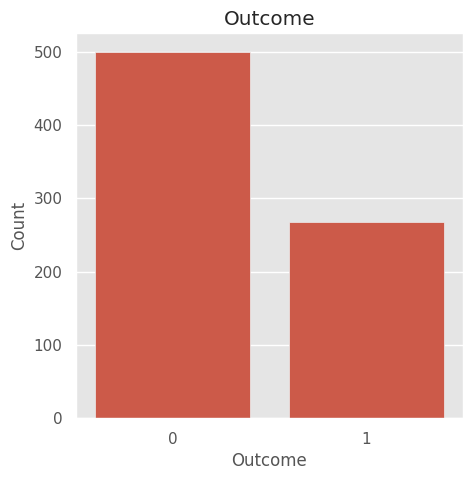

In [14]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Display the plot
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

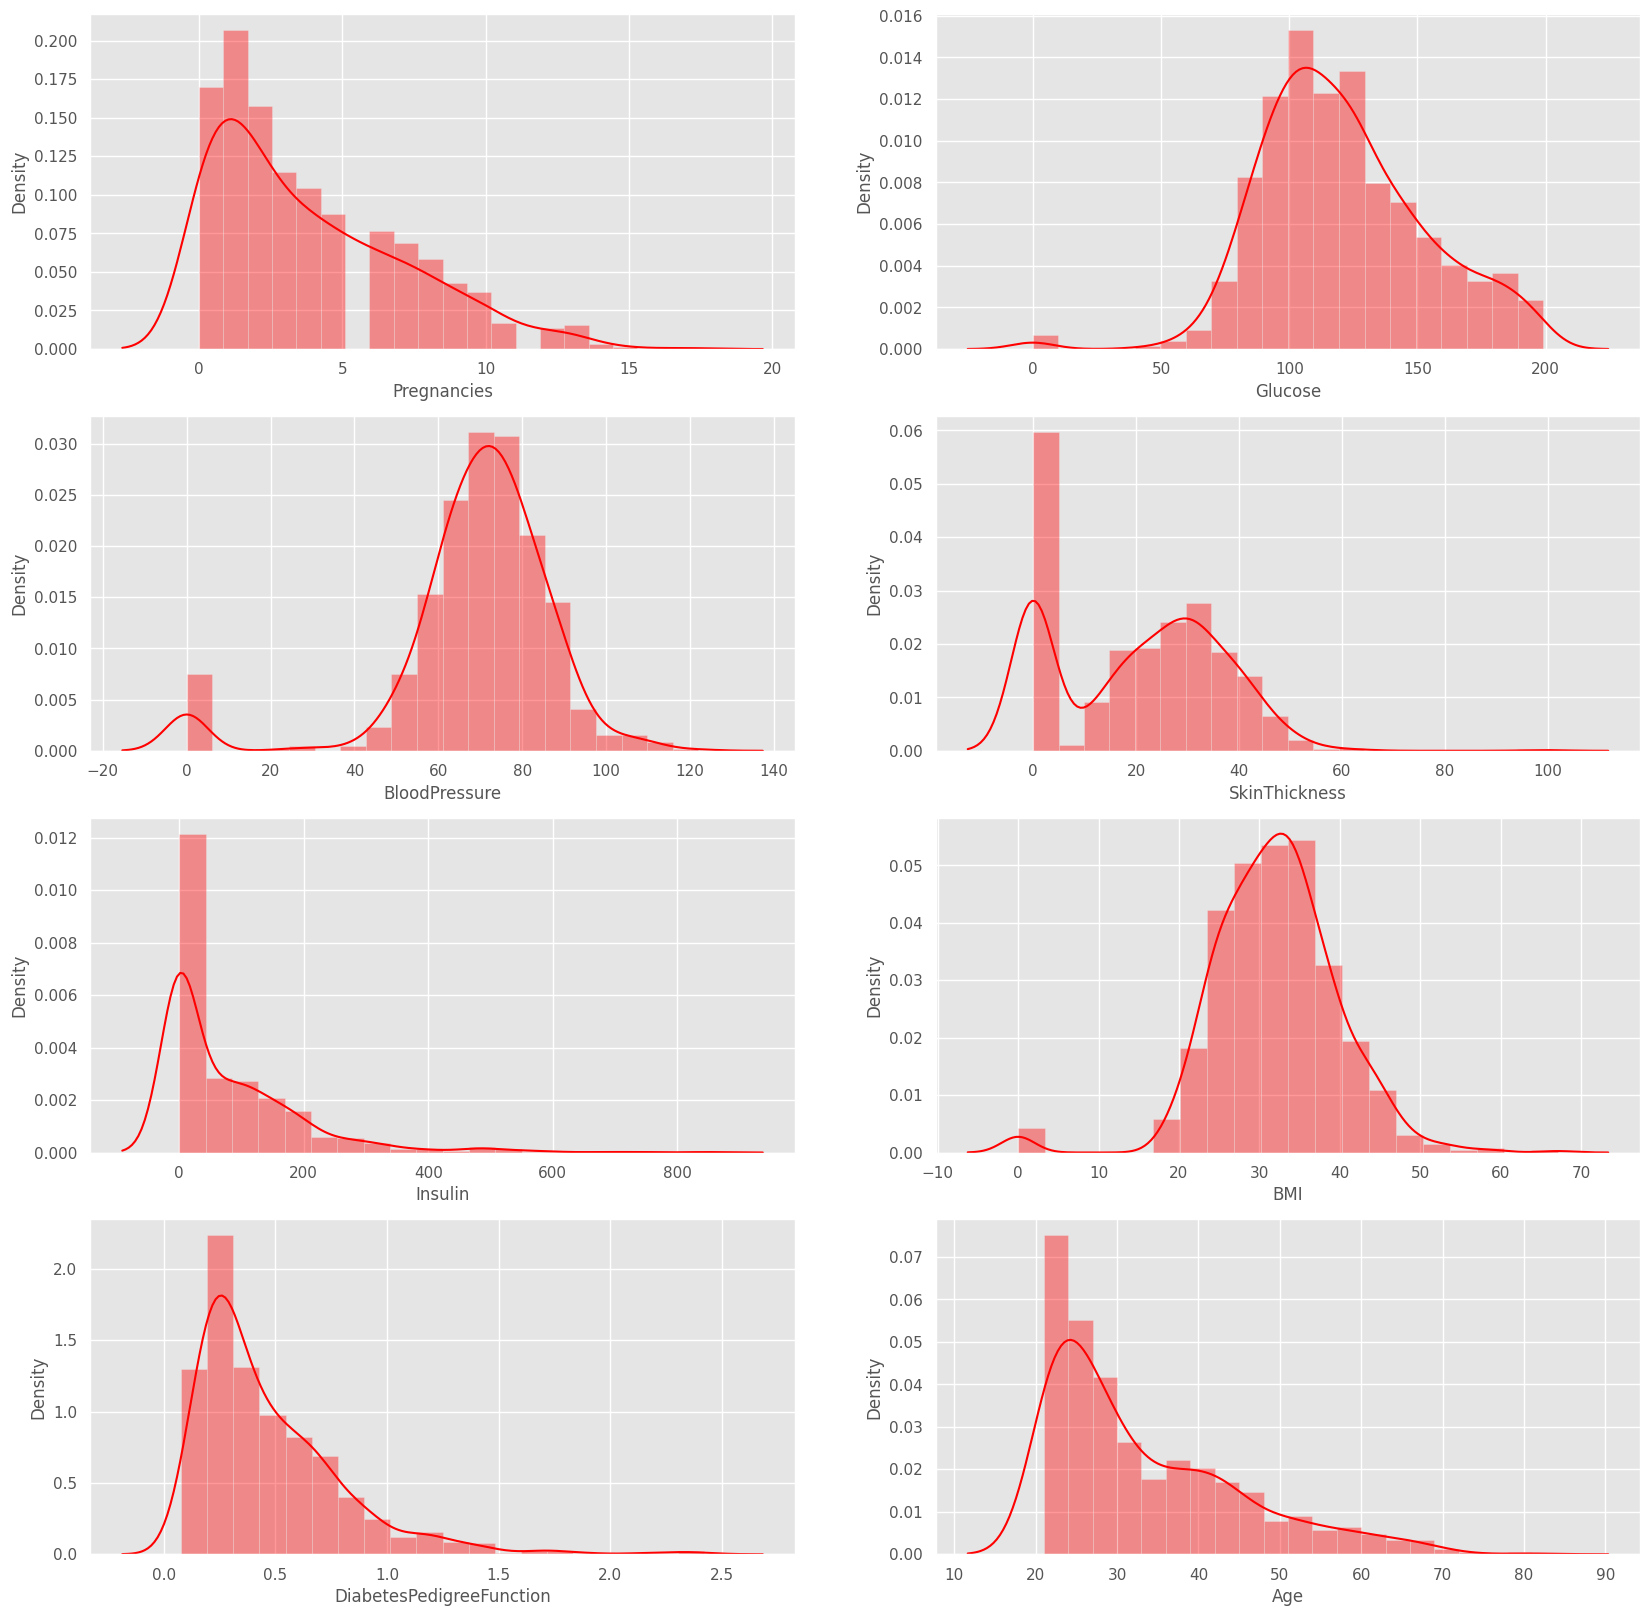

In [15]:
#for detailed analysis of all the distributions of the columns
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

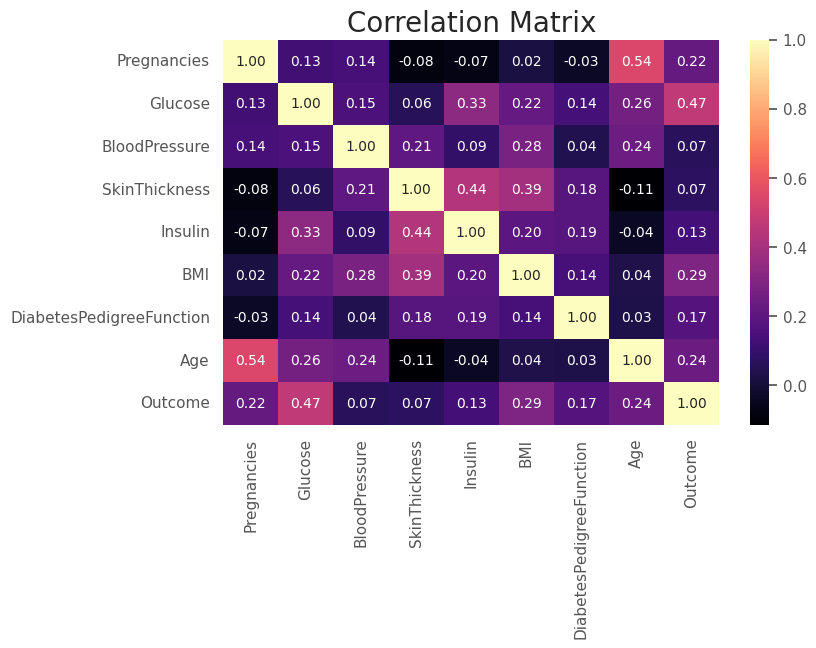

In [16]:
#correlation matrix heatmap
f,ax = plt.subplots(figsize=[8,5])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# DATA PREPROCESSING

In [17]:
# 0>healthy
# 1>diabetes
zero_counts = (df == 0).sum()
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
#reqiured columns are Glucose, BloodPressure, SkinThickness, Insulin, BMI because 0 can be case of missing values but pregnancies can be zero
#from the above graphs

In [19]:
skewness = df.skew()
skew_threshold = 0.5
skewed_columns = []
normal_columns = []

for col, skew in skewness.items():
    if abs(skew) > skew_threshold:
        skewed_columns.append(col)
    else:
        normal_columns.append(col)

In [21]:
skewed_columns

['Pregnancies',
 'BloodPressure',
 'Insulin',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

out of these only blood pressure and insulin are needed for us

In [22]:
skewed = ['BloodPressure','Insulin']

In [23]:
normal_columns

['Glucose', 'SkinThickness', 'BMI']

In [28]:
#using median to replace the missing values
for column_name in skewed:
    median_values = df.groupby('Outcome')[column_name].median()
    for outcome, median_value in median_values.items():
        df.loc[(df[column_name] == 0) & (df['Outcome'] == outcome), column_name] = median_value

In [29]:
#using mean to replace the missing values
for column_name in normal_columns:
    mean_values = df.groupby('Outcome')[column_name].mean()
    for outcome, mean_value in mean_values.items():
        df.loc[(df[column_name] == 0) & (df['Outcome'] == outcome), column_name] = mean_value

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.000000,0.0,33.6,0.627,50,1
1,1,85.0,66,29.000000,39.0,26.6,0.351,31,0
2,8,183.0,64,22.164179,0.0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40,35.000000,168.0,43.1,2.288,33,1


checking the pairplot for more detailed anaylsis and checking for outliers in the data

In [31]:
p = sns.pairplot(df, hue="Outcome")

Output hidden; open in https://colab.research.google.com to view.

In [32]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


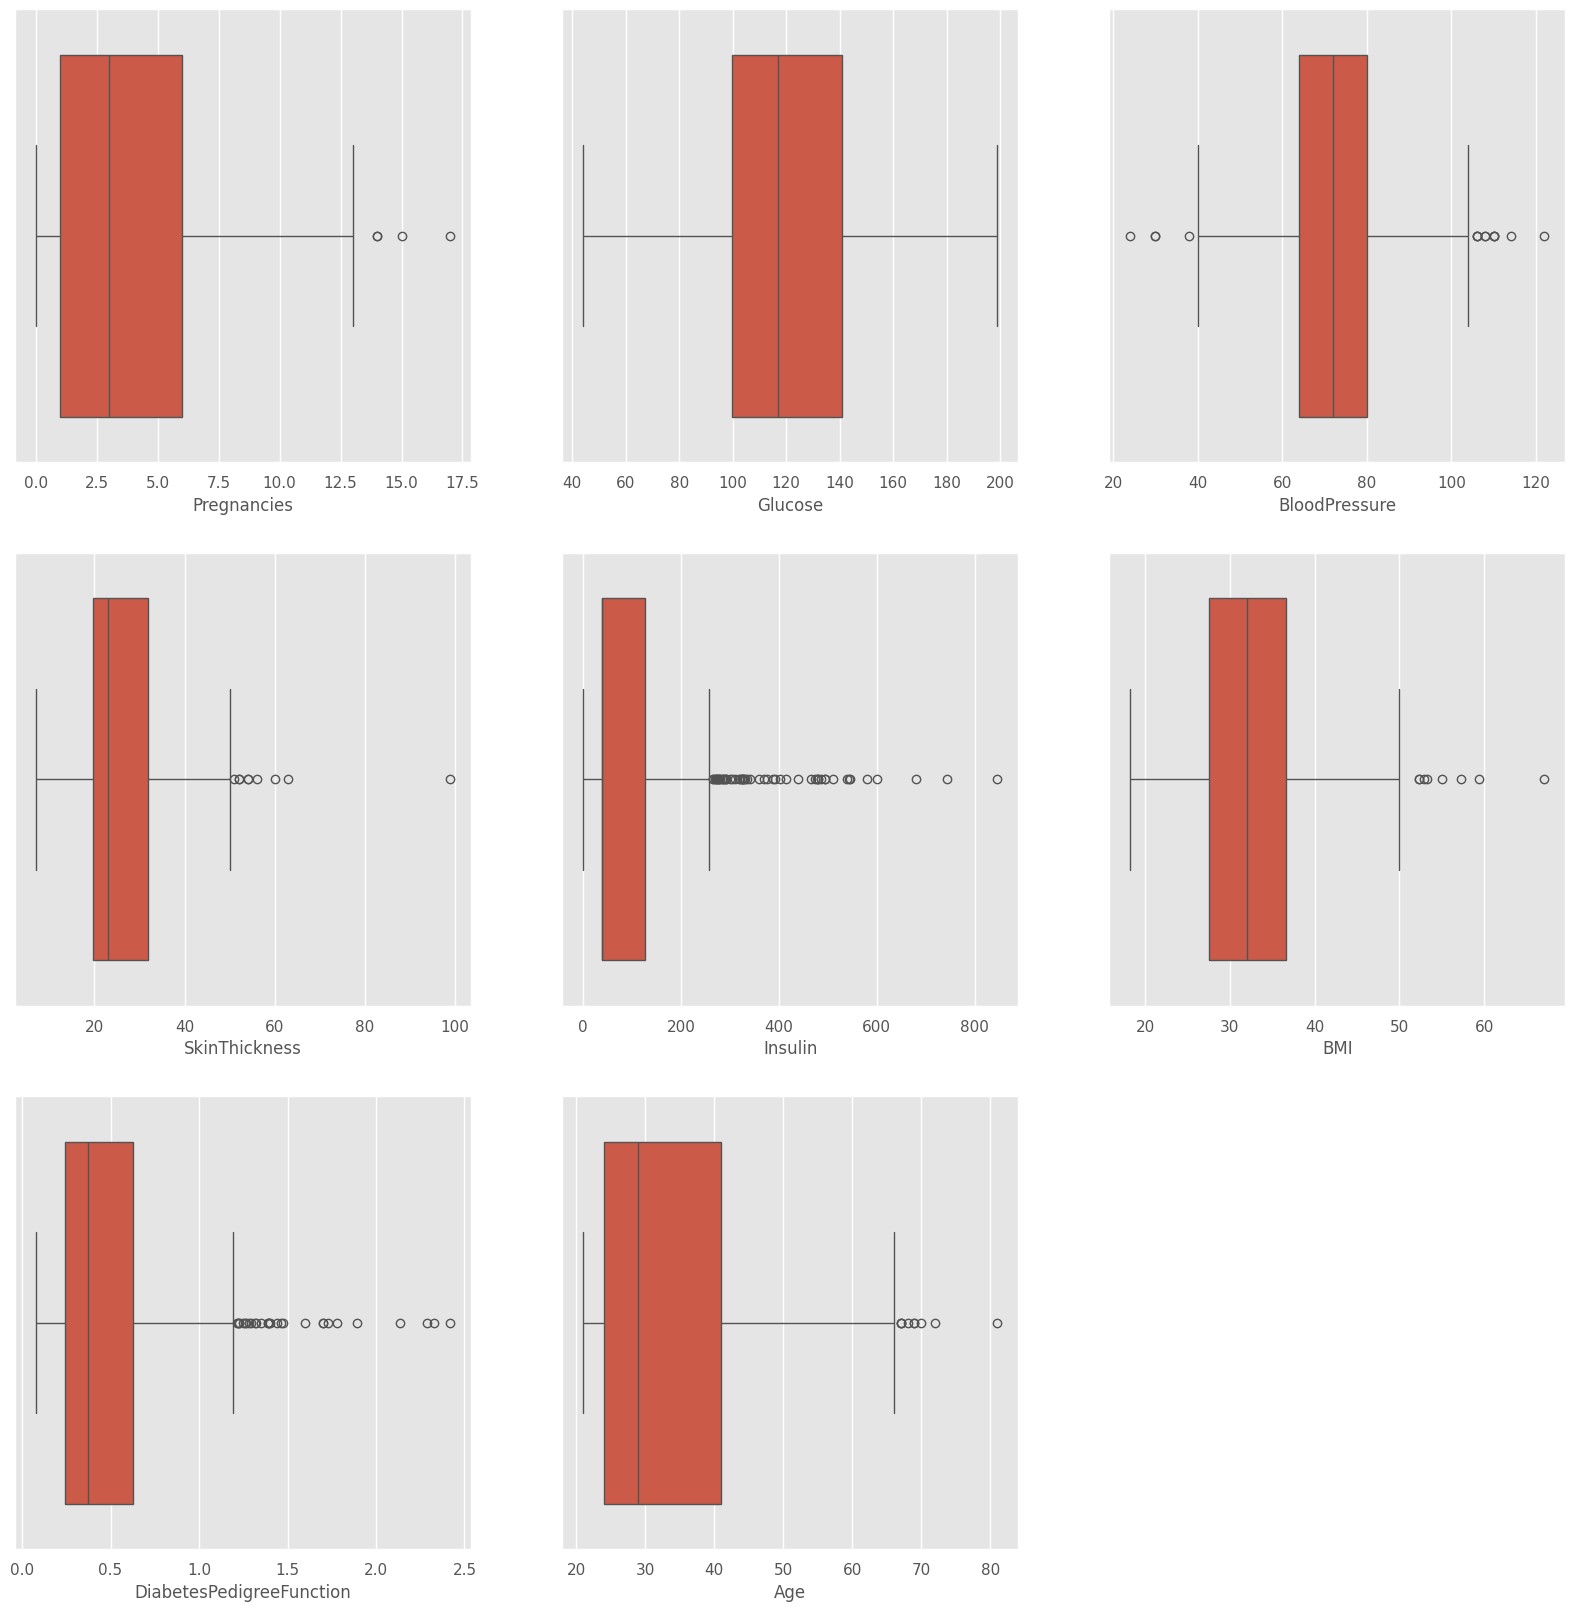

In [33]:
plt.figure(figsize = (20,20))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

as we can see insulin and diabetespedigreefunction has a lot of outliers

In [34]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

for insulin outliers

In [35]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

for diabetespedigreefunction outliers

In [36]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction']>upper, "DiabetesPedigreeFunction"] = upper

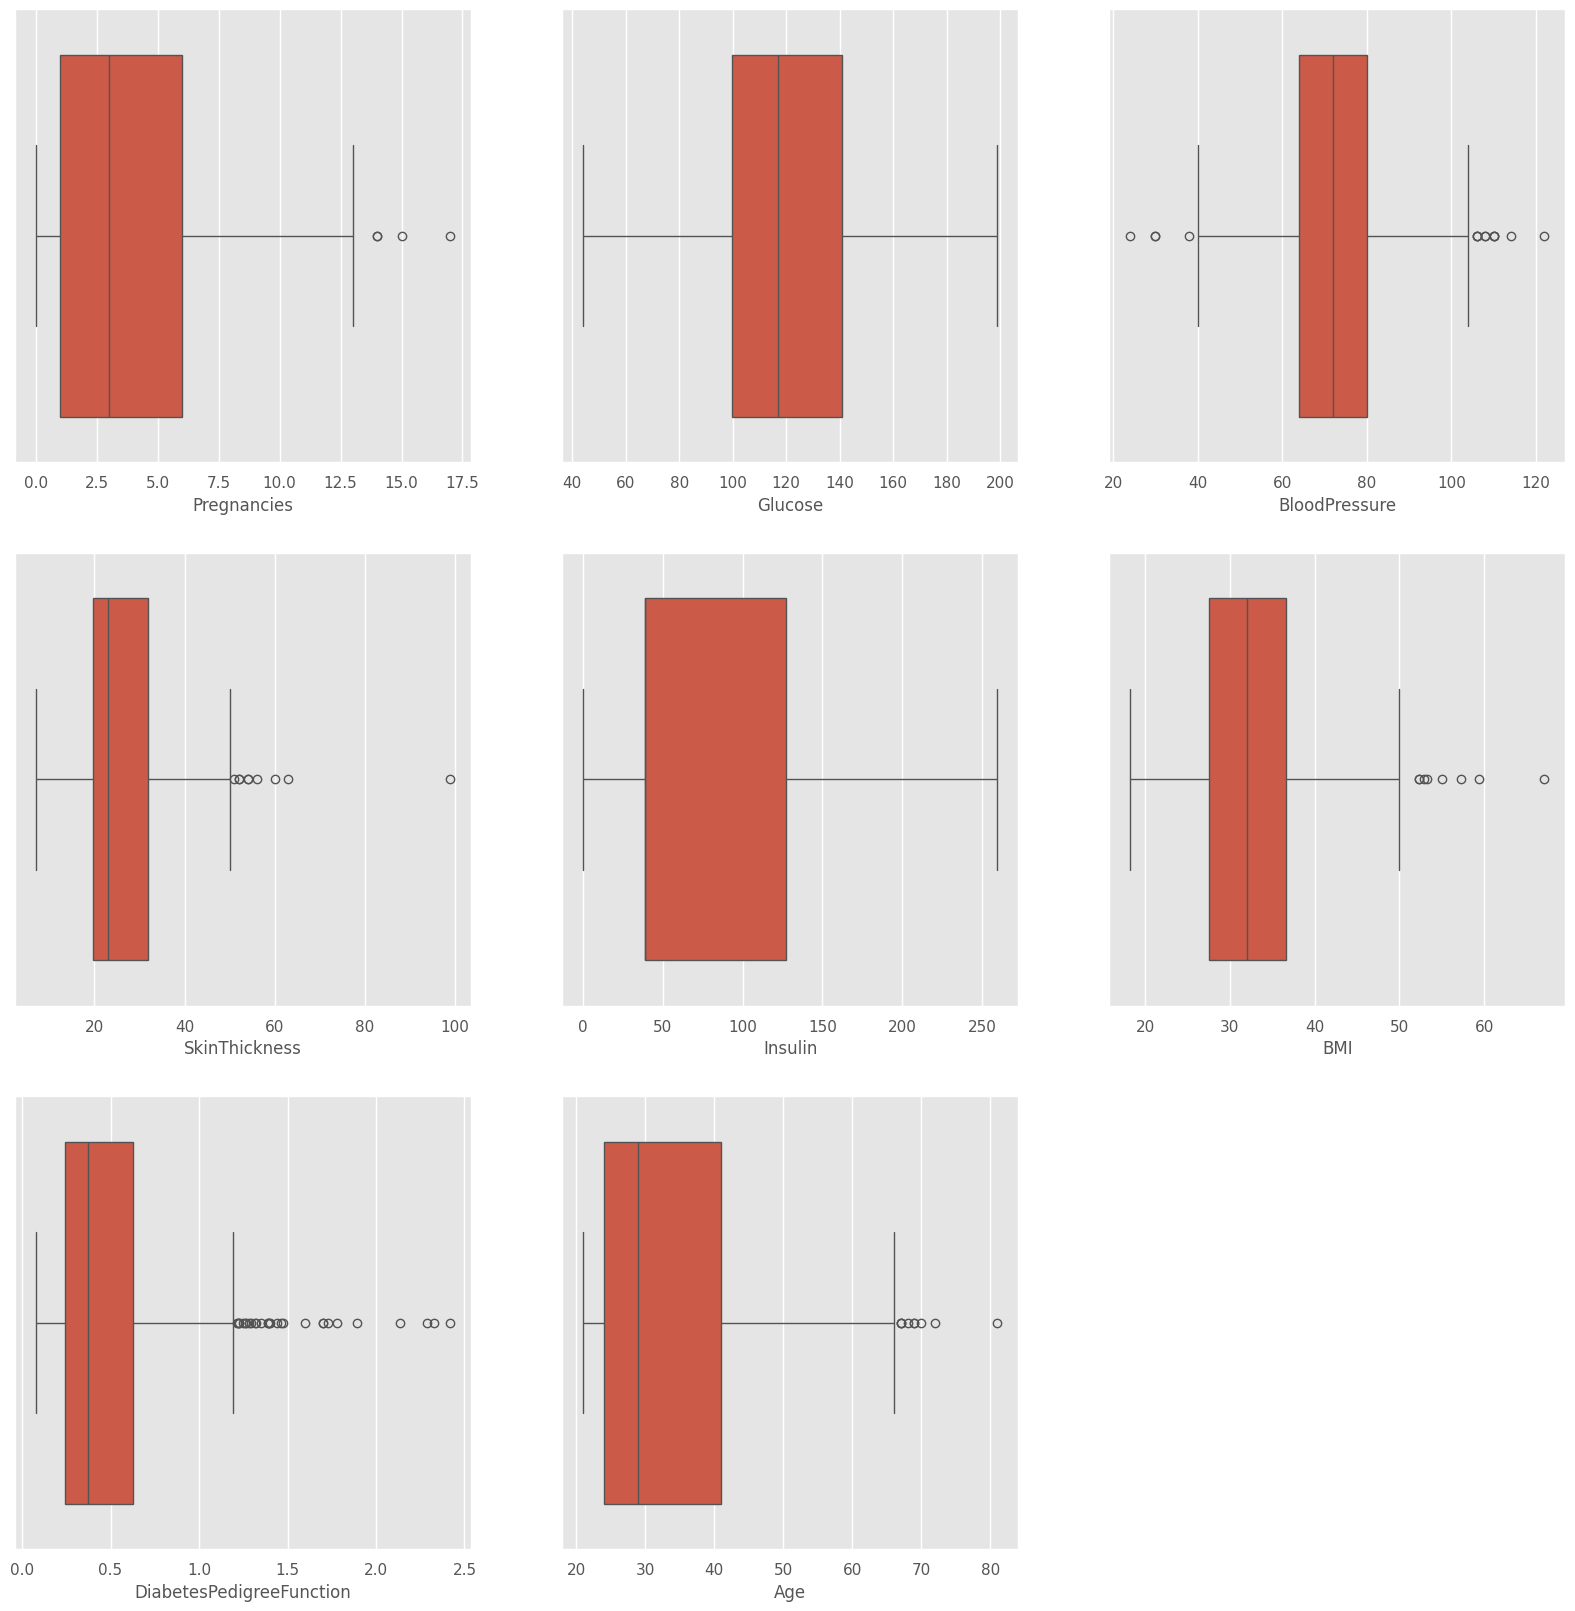

In [37]:
plt.figure(figsize = (20,20))
for i, col in enumerate(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

In [38]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

standardizing the data for model training

In [41]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop(['Outcome'],axis = 1),), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [42]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864220,-0.031324,0.868648,-1.064369,0.168817,0.468492,1.425995
1,-0.844885,-1.205336,-0.527333,0.245583,-0.560598,-0.849222,-0.365061,-0.190672
2,1.233880,2.013974,-0.692669,-0.464277,-1.064369,-1.329154,0.604397,-0.105584
3,-0.844885,-1.073935,-0.527333,-0.377482,0.149847,-0.631071,-0.920763,-1.041549
4,-1.141852,0.502869,-2.676706,0.868648,1.105719,1.550440,5.484909,-0.020496


In [43]:
Y = df['Outcome']

In [44]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [45]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

# MODEL SELECTION

logistic regression

In [46]:
#logistic regression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [47]:
Y_pred = log_reg.predict(X_test)

In [48]:
accuracy_score(Y_train, log_reg.predict(X_train))

0.7915309446254072

In [49]:
log_reg_acc = accuracy_score(Y_test, log_reg.predict(X_test))

In [50]:
confusion_matrix(Y_test, Y_pred)

array([[91,  9],
       [26, 28]])

In [51]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



KNN MODEL

In [52]:
#knn
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print(accuracy_score(Y_train, knn.predict(X_train)))
knn_acc = accuracy_score(Y_test, knn.predict(X_test))
print(accuracy_score(Y_test, knn.predict(X_test)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.8566775244299675
0.7402597402597403
[[87 13]
 [27 27]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.68      0.50      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154



SUPPORT VECTOR MACHINE

In [54]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [58]:
#FINDING THE BEST PARAMS
grid_search.best_params_

{'C': 20, 'gamma': 0.1}

In [59]:
grid_search.best_score_

0.8272824203651872

In [60]:
svc = SVC(C=20, gamma = 0.1, probability=True)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
print(accuracy_score(Y_train, svc.predict(X_train)))
svc_acc = accuracy_score(Y_test, svc.predict(X_test))
print(accuracy_score(Y_test, svc.predict(X_test)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9609120521172638
0.8246753246753247
[[91  9]
 [18 36]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       100
           1       0.80      0.67      0.73        54

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



decision tree

In [62]:
#decision tree
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
Y_pred = DT.predict(X_test)
print(accuracy_score(Y_train, DT.predict(X_train)))

print(accuracy_score(Y_test, DT.predict(X_test)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

1.0
0.8636363636363636
[[90 10]
 [11 43]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       100
           1       0.81      0.80      0.80        54

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154



in this casse as we can see there is overfitting in the case of training data

HYPERPARAMETER TUNING

In [63]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, Y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [64]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [65]:
grid_search_dt.best_score_

0.877948717948718

In [66]:
DT = grid_search_dt.best_estimator_
Y_pred = DT.predict(X_test)
print(accuracy_score(Y_train, DT.predict(X_train)))
dt_acc = accuracy_score(Y_test, DT.predict(X_test))
print(accuracy_score(Y_test, DT.predict(X_test)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.8827361563517915
0.8376623376623377
[[91  9]
 [16 38]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       100
           1       0.81      0.70      0.75        54

    accuracy                           0.84       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.84      0.84      0.83       154



RANDOM FOREST CLASSIFIER

In [67]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [68]:
y_pred = rand_clf.predict(X_test)

In [69]:
Y_pred = rand_clf.predict(X_test)
print(accuracy_score(Y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(Y_test, rand_clf.predict(X_test))
print(accuracy_score(Y_test, rand_clf.predict(X_test)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.995114006514658
0.8831168831168831
[[95  5]
 [13 41]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       100
           1       0.89      0.76      0.82        54

    accuracy                           0.88       154
   macro avg       0.89      0.85      0.87       154
weighted avg       0.88      0.88      0.88       154



GRADIENT BOOSTING CLASSIFIER

In [70]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, Y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [71]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 150}

In [72]:
grid_search_gbc.best_score_

0.8876520359598095

In [74]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)
gbc.fit(X_train, Y_train)

GradientBoostingClassifier(loss='deviance', n_estimators=150)

In [75]:
gbc = grid_search_gbc.best_estimator_
Y_pred = gbc.predict(X_test)
print(accuracy_score(Y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(Y_test, gbc.predict(X_test))
print(accuracy_score(Y_test, gbc.predict(X_test)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.993485342019544
0.9025974025974026
[[97  3]
 [12 42]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       100
           1       0.93      0.78      0.85        54

    accuracy                           0.90       154
   macro avg       0.91      0.87      0.89       154
weighted avg       0.91      0.90      0.90       154



XGB CLASSIFIER

In [76]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
Y_pred = xgb.predict(X_test)
print(accuracy_score(Y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(Y_test, xgb.predict(X_test))
print(accuracy_score(Y_test, xgb.predict(X_test)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

0.9771986970684039
0.8831168831168831
[[96  4]
 [14 40]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       100
           1       0.91      0.74      0.82        54

    accuracy                           0.88       154
   macro avg       0.89      0.85      0.87       154
weighted avg       0.89      0.88      0.88       154



# MODEL COMPARISION

In [78]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4),
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting Classifier,90.26
4,Random Forest Classifier,88.31
6,XgBoost,88.31
3,Decision Tree Classifier,83.77
2,SVM,82.47
0,Logistic Regression,77.27
1,KNN,74.03


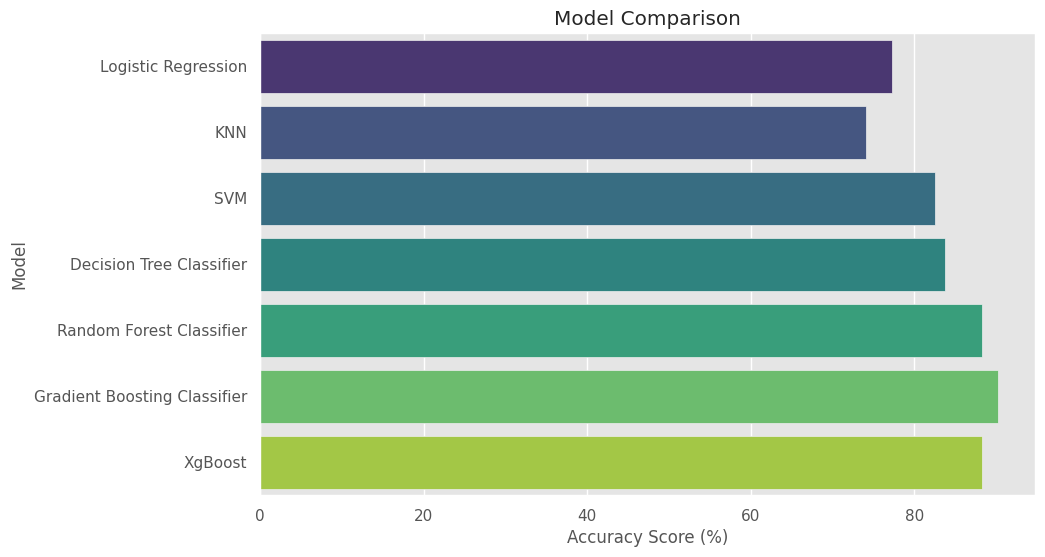

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Model', data=models, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Model')
plt.show()

# CONCLUSION

**IN CONCLUSION THE MOST ACCURATE RESULTS ARE SHOWN BY GRADIENT BOOSTING CLASSIFIER WITH 90.26% ACCURACY**